#9章 回帰問題

##9.1 線形回帰モデル

###9.1.1 例題　カリフォルニア住宅価格問題

In [1]:
import pandas as pd
import numpy as np

#手順１　データの読み込み
# サンプルデータが収められているモジュール scikit-learnの
# datasetsから目的のデータセットを読み込む
from sklearn.datasets import fetch_california_housing
# cal_dfとしてデータを変数に読み込む
cal_df = fetch_california_housing(as_frame=True)

# 特徴ベクトル（説明変数をベクトルデータ）として読み込む
cal_X = cal_df.data
display( cal_X )

# 正解ラベル（目的変数）を読み込む
cal_y = cal_df.target
display( cal_y )

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [2]:
# 特徴ベクトルとラベルを結合する
cal_all = pd.concat([cal_X, cal_y], axis=1)
display( cal_all )

# 基本統計量の表示
display( cal_all.describe() )

# 相関行列
rel = cal_all.corr()
display( rel )


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [3]:
# 手順2　前処理
# 予測するための特徴量Xとして、MedIncとAveRoomsを採用
X = cal_X[["MedInc", "AveRooms"]]
y = cal_y

# 標準化された特徴量X_stdと正解ラベルを訓練データと評価データに7:3で分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
# 標準化 fit_transformメソッドにより特徴量Xが標準化される
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

print(f"全データの次数 {cal_all.shape}")
print(f"訓練用の特徴ベクトルの次数 {X_train_sc.shape} 正解ラベルの次数{y_train.shape}")
print(f"評価用の特徴ベクトルの次数 {X_test_sc.shape} 正解ラベルの次数 {y_test.shape}")


全データの次数 (20640, 9)
訓練用の特徴ベクトルの次数 (14448, 2) 正解ラベルの次数(14448,)
評価用の特徴ベクトルの次数 (6192, 2) 正解ラベルの次数 (6192,)


In [4]:
# 手順３
# 線形回帰モデルのインポート
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [5]:
# 手順４
# モデルの学習　標準化されたデータを使う
model.fit(X_train_sc, y_train)

# 線形式のパラメータ表示
print(f"パラメータ{model.coef_}")
print(f"切片 {model.intercept_}")


パラメータ[ 0.81906127 -0.08866776]
切片 2.0666131402270214


In [6]:
# 手順５　評価用のデータをモデルに適用し結果を予測
# y_train_predに訓練用特徴ベクトルをモデルに代入したときの予測を計算
y_train_pred = model.predict(X_train_sc)

# 評価用の特徴ベクトルをモデルに代入し予測値を計算
y_test_pred = model.predict(X_test_sc)

# 評価用データの先頭5件分の予測値と実データの違い
print(f"実データ\n {np.array(y_test[:5])}")
print(f"予測データ\n {y_test_pred[:5]}")

実データ
 [1.674 3.541 1.602 1.408 1.078]
予測データ
 [2.71420574 2.14260957 2.38240325 1.76687507 2.40598292]


In [7]:
# 手順６
# モデルの正確性を評価する

# MAEで評価する場合
from sklearn.metrics import mean_absolute_error
# 決定係数を算出する
from sklearn.metrics import r2_score

# 訓練用データのMAE
mae_train = mean_absolute_error(y_train, y_train_pred)
# 評価用データのMAE
mae_test = mean_absolute_error(y_test, y_test_pred)

# RMSEで評価する場合
from sklearn.metrics import mean_squared_error
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# 決定係数
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"訓練データ MAE={mae_train:.3f}　RMSE={rmse_train:.3f} r2={r2_train:.3f}")
print(f"評価データ MAE={mae_test:.3f}　RMSE={rmse_test:.3f} r2={r2_test:.3f}")


訓練データ MAE=0.619　RMSE=0.831 r2=0.478
評価データ MAE=0.622　RMSE=0.837 r2=0.483


###9.1.2　モデルのチューニング

In [8]:
#手順１　データの読み込み
# サンプルデータが収められているモジュール scikit-learnの
# datasetsから目的のデータセットを読み込む
from sklearn.datasets import fetch_california_housing
# cal_dfとしてデータを変数に読み込む
cal_df = fetch_california_housing(as_frame=True)

# 特徴ベクトル（説明変数をベクトルデータ）として読み込む
cal_X = cal_df.data
#display( cal_X )

# 正解ラベル（目的変数）を読み込む
cal_y = cal_df.target
#display( cal_y )

# 特徴ベクトルとラベルを結合する
cal_all = pd.concat([cal_X, cal_y], axis=1)
#display( cal_all )

# 基本統計量の表示
#display( cal_all.describe() )

# 相関行列
rel = cal_all.corr()
#display( rel )

# 手順2　前処理
# 四分位範囲（IQR）を用いて外れ値を除外する関数
def remove_outliers_iqr(df, columns):
    # 例外データの閾値 1.5 2.0 3.0 など
    threshold = 2.0
    for column in columns:
        Q1 = df[column].quantile(0.25)  # 第1四分位数
        Q3 = df[column].quantile(0.75)  # 第3四分位数
        IQR = Q3 - Q1  # 四分位範囲
        lower_bound = Q1 - threshold * IQR  # 下限
        upper_bound = Q3 + threshold * IQR  # 上限

        # 外れ値の条件に合致する行数を記録
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        # 下限より小さい値、または上限より大きい値を除外
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        print(f"{column} [l,h]=[{lower_bound:.3f},{upper_bound:.3f}] 削除件数{len(outliers)}")
    return df

# IQRで外れ値を除外
df_cleaned = remove_outliers_iqr(cal_df.frame,["MedInc", "AveRooms", "MedHouseVal"])
#df_cleaned = remove_outliers_iqr(cal_df.frame, cal_df.frame.columns)

# 特徴量とターゲットの分割
#X = df_cleaned.drop(columns=["MedHouseVal"])  # 特徴量
X = df_cleaned[["MedInc", "AveRooms"]]  # 特徴量
y = df_cleaned["MedHouseVal"]  # 目的変数

# データ分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
# 標準化 fit_transformメソッドにより特徴量Xが標準化される
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)
print(f"全データの次数 {cal_df.frame.shape}")
print(f"訓練用の特徴ベクトルの次数 {X_train.shape} 正解ラベルの次数{y_train.shape}")
print(f"評価用の特徴ベクトルの次数 {X_test.shape} 正解ラベルの次数 {y_test.shape}")

# 手順３
# 線形回帰モデルのインポート
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# 手順４
# モデルの学習　標準化されたデータを使う
model.fit(X_train_sc, y_train)

# 線形式のパラメータ表示
print(f"パラメータ{model.coef_}")
print(f"切片 {model.intercept_}")

# 手順５　評価用のデータをモデルに適用し結果を予測
# y_train_predに訓練用特徴ベクトルをモデルに代入したときの予測を計算
y_train_pred = model.predict(X_train_sc)
# 評価用の特徴ベクトルをモデルに代入し予測値を計算
y_test_pred = model.predict(X_test_sc)
# 評価用データの先頭5件分の予測値と実データの違い
print(f"実データ\n {np.array(y_test[:5])}")
print(f"予測データ\n {y_test_pred[:5]}")

# 手順６
# モデルの正確性を評価する

# MAEで評価する場合
from sklearn.metrics import mean_absolute_error
# 決定係数を算出する
from sklearn.metrics import r2_score

# 訓練用データのMAE
mae_train = mean_absolute_error(y_train, y_train_pred)
# 評価用データのMAE
mae_test = mean_absolute_error(y_test, y_test_pred)

# RMSEで評価する場合
from sklearn.metrics import mean_squared_error
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# 決定係数
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"訓練データ MAE={mae_train:.3f}　RMSE={rmse_train:.3f} r2={r2_train:.3f}")
print(f"評価データ MAE={mae_test:.3f}　RMSE={rmse_test:.3f} r2={r2_test:.3f}")


MedInc [l,h]=[-1.796,9.103] 削除件数394
AveRooms [l,h]=[1.284,9.135] 削除件数277
MedHouseVal [l,h]=[-1.610,5.385] 削除件数0
全データの次数 (20640, 9)
訓練用の特徴ベクトルの次数 (13978, 2) 正解ラベルの次数(13978,)
評価用の特徴ベクトルの次数 (5991, 2) 正解ラベルの次数 (5991,)
パラメータ[ 0.92366907 -0.31697872]
切片 2.015905530118758
実データ
 [2.341 1.125 1.36  3.496 1.375]
予測データ
 [2.45198542 2.20993482 1.33753127 2.18902763 0.93375582]
訓練データ MAE=0.588　RMSE=0.799 r2=0.471
評価データ MAE=0.591　RMSE=0.791 r2=0.474


####すべての変数を使用する場合「手順2 前処理」に対応するプログラム

In [9]:
#手順１　データの読み込み
# サンプルデータが収められているモジュール scikit-learnの
# datasetsから目的のデータセットを読み込む
from sklearn.datasets import fetch_california_housing
# cal_dfとしてデータを変数に読み込む
cal_df = fetch_california_housing(as_frame=True)

# 特徴ベクトル（説明変数をベクトルデータ）として読み込む
cal_X = cal_df.data
#display( cal_X )

# 正解ラベル（目的変数）を読み込む
cal_y = cal_df.target
#display( cal_y )

# 特徴ベクトルとラベルを結合する
cal_all = pd.concat([cal_X, cal_y], axis=1)
#display( cal_all )

# 基本統計量の表示
#display( cal_all.describe() )

# 相関行列
rel = cal_all.corr()
#display( rel )

# 手順2　前処理
# 四分位範囲（IQR）を用いて外れ値を除外する関数
def remove_outliers_iqr(df, columns):
    # 例外データの閾値 1.5 2.0 3.0 など
    threshold = 2.0
    for column in columns:
        Q1 = df[column].quantile(0.25)  # 第1四分位数
        Q3 = df[column].quantile(0.75)  # 第3四分位数
        IQR = Q3 - Q1  # 四分位範囲
        lower_bound = Q1 - threshold * IQR  # 下限
        upper_bound = Q3 + threshold * IQR  # 上限

        # 外れ値の条件に合致する行数を記録
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        # 下限より小さい値、または上限より大きい値を除外
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        print(f"{column} [l,h]=[{lower_bound:.3f},{upper_bound:.3f}] 削除件数{len(outliers)}")
    return df

# IQRで外れ値を除外
#df_cleaned = remove_outliers_iqr(cal_df.frame,["MedInc", "AveRooms", "MedHouseVal"])
df_cleaned = remove_outliers_iqr(cal_df.frame, cal_df.frame.columns)

# 特徴量とターゲットの分割
#X = df_cleaned[["MedInc", "AveRooms"]]  # 特徴量
X = df_cleaned.drop(columns=["MedHouseVal"])  # 特徴量
y = df_cleaned["MedHouseVal"]  # 目的変数

# データ分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
# 標準化 fit_transformメソッドにより特徴量Xが標準化される
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)
print(f"全データの次数 {cal_df.frame.shape}")
print(f"訓練用の特徴ベクトルの次数 {X_train.shape} 正解ラベルの次数{y_train.shape}")
print(f"評価用の特徴ベクトルの次数 {X_test.shape} 正解ラベルの次数 {y_test.shape}")

# 手順３
# 線形回帰モデルのインポート
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# 手順４
# モデルの学習　標準化されたデータを使う
model.fit(X_train_sc, y_train)

# 線形式のパラメータ表示
print(f"パラメータ{model.coef_}")
print(f"切片 {model.intercept_}")

# 手順５　評価用のデータをモデルに適用し結果を予測
# y_train_predに訓練用特徴ベクトルをモデルに代入したときの予測を計算
y_train_pred = model.predict(X_train_sc)
# 評価用の特徴ベクトルをモデルに代入し予測値を計算
y_test_pred = model.predict(X_test_sc)
# 評価用データの先頭5件分の予測値と実データの違い
print(f"実データ\n {np.array(y_test[:5])}")
print(f"予測データ\n {y_test_pred[:5]}")

# 手順６
# モデルの正確性を評価する

# MAEで評価する場合
from sklearn.metrics import mean_absolute_error
# 決定係数を算出する
from sklearn.metrics import r2_score

# 訓練用データのMAE
mae_train = mean_absolute_error(y_train, y_train_pred)
# 評価用データのMAE
mae_test = mean_absolute_error(y_test, y_test_pred)

# RMSEで評価する場合
from sklearn.metrics import mean_squared_error
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# 決定係数
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"訓練データ MAE={mae_train:.3f}　RMSE={rmse_train:.3f} r2={r2_train:.3f}")
print(f"評価データ MAE={mae_test:.3f}　RMSE={rmse_test:.3f} r2={r2_test:.3f}")


MedInc [l,h]=[-1.796,9.103] 削除件数394
HouseAge [l,h]=[-20.000,75.000] 削除件数0
AveRooms [l,h]=[1.284,9.135] 削除件数277
AveBedrms [l,h]=[0.823,1.280] 削除件数822
Population [l,h]=[-1053.000,3642.000] 削除件数752
AveOccup [l,h]=[0.720,5.001] 削除件数279
Latitude [l,h]=[26.400,45.250] 削除件数0
Longitude [l,h]=[-129.380,-110.480] 削除件数0
MedHouseVal [l,h]=[-1.626,5.459] 削除件数0
全データの次数 (20640, 9)
訓練用の特徴ベクトルの次数 (12681, 8) 正解ラベルの次数(12681,)
評価用の特徴ベクトルの次数 (5435, 8) 正解ラベルの次数 (5435,)
パラメータ[ 0.80550093  0.16827221 -0.17784725  0.13012745  0.04630361 -0.27077979
 -0.82822573 -0.76417288]
切片 2.0331753789133336
実データ
 [1.429 1.22  3.088 2.864 1.156]
予測データ
 [1.57353515 1.54515526 3.02146568 2.38736072 0.77875745]
訓練データ MAE=0.476　RMSE=0.641 r2=0.660
評価データ MAE=0.482　RMSE=0.650 r2=0.652


##9.2 多項式回帰と過学習

###9.2.1 多項式回帰分析

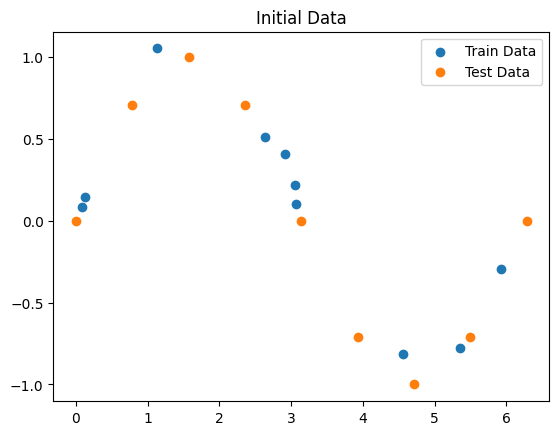

In [10]:
#手順１　訓練データと評価データの作成
import numpy as np
import pandas as pd

#sin関数を乱数で訓練用のデータを
np.random.seed(11)
X = np.random.uniform(0.0, 2 * np.pi, 10)
y = np.sin(X) + np.random.uniform(0,0.2,10)

#手順２
#訓練用のデータは、Sin関数にノイズを与えたデータ
X_train = X.reshape(-1,1)
y_train = y
#評価用のデータは、0から1/4π間隔で2πのSin関数の値
X_test = np.arange(0, 2 * np.pi + 0.25 * np.pi, 0.25 * np.pi).reshape(-1,1)
y_test = np.sin(X_test)
#Xとyのデータをグラフで表示
import matplotlib.pyplot as plt
plt.title("Initial Data")
plt.scatter(X_train, y_train, label="Train Data")
plt.scatter(X_test, y_test, label="Test Data")
plt.legend()
plt.show()
plt.close()

MSE Train:0.171 Test:0.274


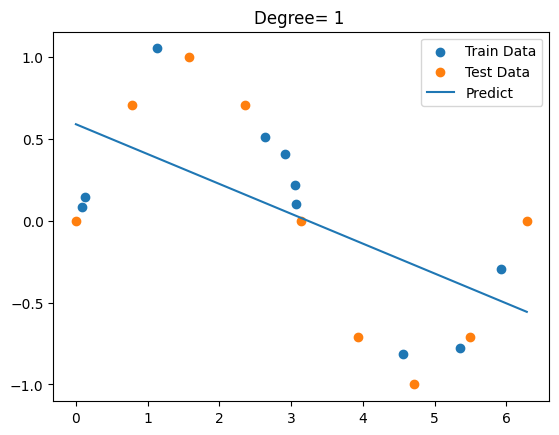

In [11]:
#手順3　モデルの選択
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#手順4　モデルの訓練
model.fit(X_train, y_train)

#手順5　モデルで予測
y_train_pred= model.predict(X_train)
y_test_pred = model.predict(X_test)

#手順6　モデルの評価
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"MSE Train:{train_mse:.3f} Test:{test_mse:.3f}")

#グラフで表示
X_grid = np.linspace(0, 2 * np.pi, 100)
y_grid_pred = model.predict(X_grid.reshape(-1,1))
plt.title(f"Degree= 1 ")
plt.scatter(X_train, y_train, label="Train Data")
plt.scatter(X_test, y_test, label="Test Data")
plt.plot(X_grid, y_grid_pred,label="Predict")
plt.legend()
plt.show()
plt.close()


####2次の多項式回帰モデルで予測

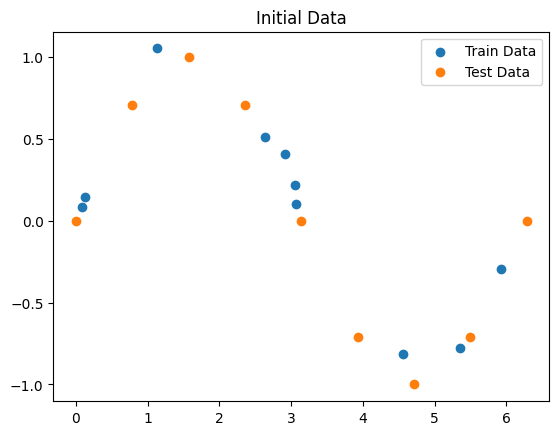

訓練データに対するMSE 0.130
評価データに対するMSE 0.316


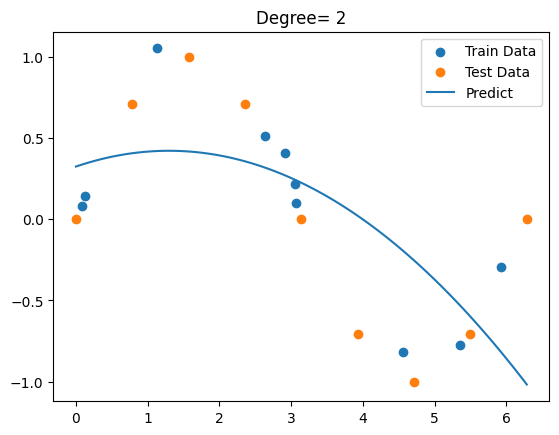

In [12]:
#手順１　訓練データと評価データの作成
import numpy as np
import pandas as pd

#sin関数を乱数で訓練用のデータを
np.random.seed(11)
X = np.random.uniform(0.0, 2 * np.pi, 10)
y = np.sin(X) + np.random.uniform(0,0.2,10)

#手順２
#訓練用のデータは、Sin関数にノイズを与えたデータ
X_train = X.reshape(-1,1)
y_train = y
#評価用のデータは、0から1/4π間隔で2πのSin関数の値
X_test = np.arange(0, 2 * np.pi + 0.25 * np.pi, 0.25 * np.pi).reshape(-1,1)
y_test = np.sin(X_test)

#Xとyのデータをグラフで表示
import matplotlib.pyplot as plt
plt.title("Initial Data")
plt.scatter(X_train, y_train, label="Train Data")
plt.scatter(X_test, y_test, label="Test Data")
plt.legend()
plt.show()
plt.close()

#多項式回帰分析をするために説明変数のデータを多項式で計算
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

#手順3　モデルの選択
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#手順4　モデルの訓練
model.fit(X_train_poly, y_train)

#手順5　モデルで予測
y_train_pred= model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

#手順6　モデルの評価
from sklearn.metrics import mean_squared_error
print(f"訓練データに対するMSE {mean_squared_error(y_train, y_train_pred):.3f}")
print(f"評価データに対するMSE {mean_squared_error(y_test, y_test_pred):.3f}")

#グラフで表示
X_grid = np.linspace(0, 2 * np.pi, 100).reshape(-1,1)
X_grid_poly = poly.fit_transform(X_grid)
y_grid_pred = model.predict(X_grid_poly)

plt.title(f"Degree= 2")
plt.scatter(X_train, y_train, label="Train Data")
plt.scatter(X_test, y_test, label="Test Data")
plt.plot(X_grid, y_grid_pred,label="Predict")
plt.legend()
plt.show()
plt.close()


####次数を2, ３, 5, 9ときと変化させた結果

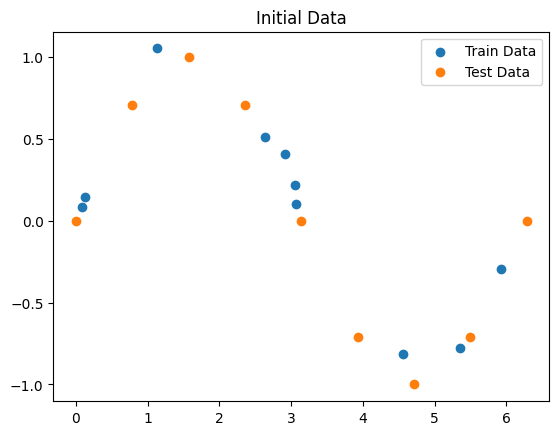

degree=1 MSE Train:0.171 Test:0.274


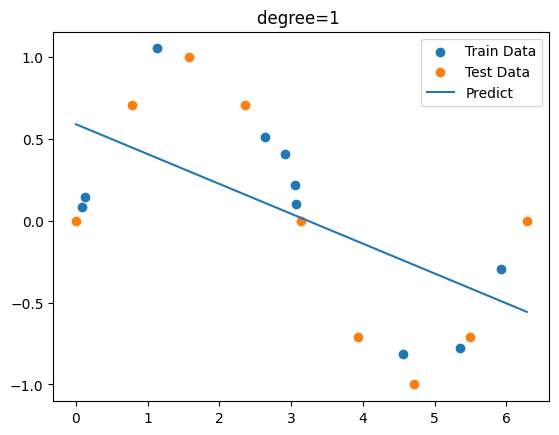

degree=2 MSE Train:0.130 Test:0.316


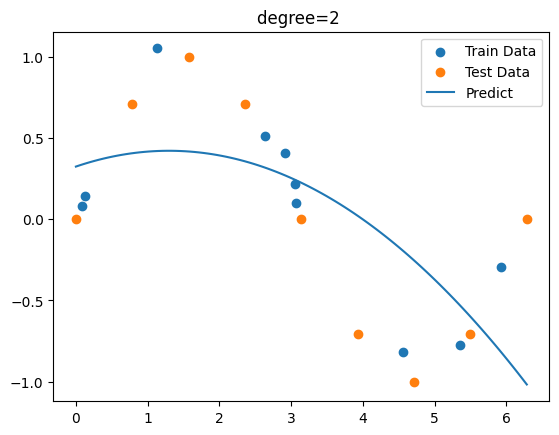

degree=3 MSE Train:0.002 Test:0.022


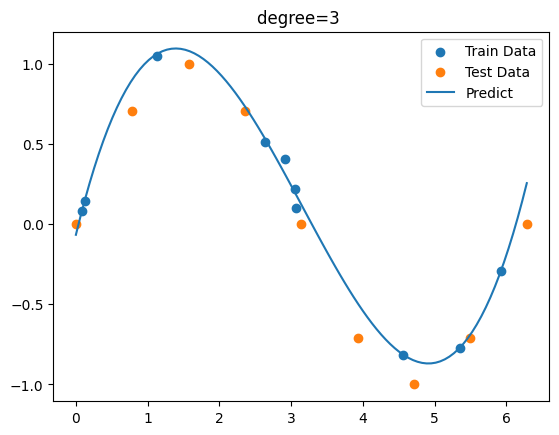

degree=5 MSE Train:0.002 Test:0.019


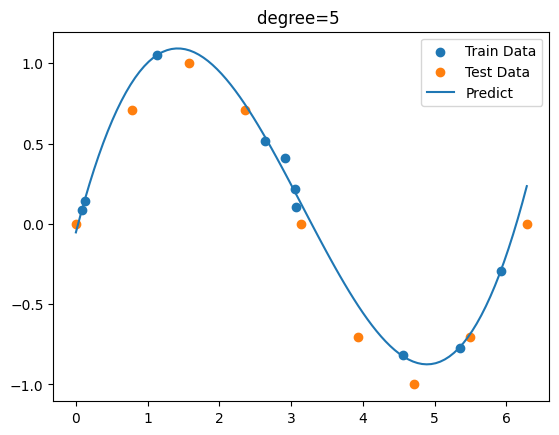

degree=9 MSE Train:0.000 Test:1303307.481


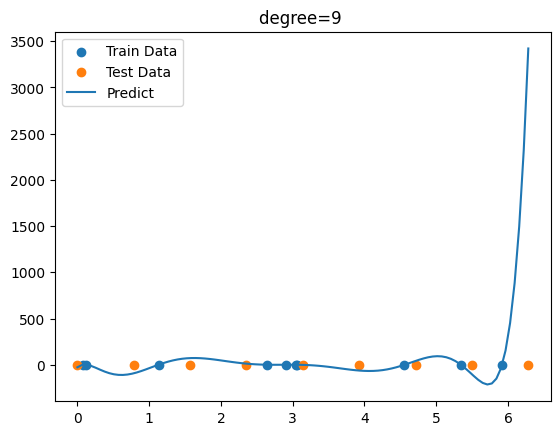

In [13]:
#多項式回帰分析をするために説明変数のデータを多項式で計算する関数
from sklearn.preprocessing import PolynomialFeatures
def make_poly_data(X_train, X_test, deg):
    poly = PolynomialFeatures(degree=deg)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)

    X_grid = np.linspace(0, 2 * np.pi, 100).reshape(-1,1)
    X_grid_poly = poly.fit_transform(X_grid)

    return X_train_poly, X_test_poly, X_grid_poly

#手順１　訓練データと評価データの作成
import numpy as np
import pandas as pd

#sin関数を乱数で訓練用のデータを
np.random.seed(11)
X = np.random.uniform(0.0, 2 * np.pi, 10)
y = np.sin(X) + np.random.uniform(0,0.2,10)

#手順２
#訓練用のデータは、Sin関数にノイズを与えたデータ
X_train = X.reshape(-1,1)
y_train = y
#評価用のデータは、0から1/4π間隔で2πのSin関数の値
X_test = np.arange(0, 2 * np.pi + 0.25 * np.pi, 0.25 * np.pi).reshape(-1,1)
y_test = np.sin(X_test)

#Xとyのデータをグラフで表示
import matplotlib.pyplot as plt
plt.title("Initial Data")
plt.scatter(X_train, y_train, label="Train Data")
plt.scatter(X_test, y_test, label="Test Data")
plt.legend()
plt.show()
plt.close()

for deg in [1,2,3,5,9]:
    #データを多項式に
    X_train_poly, X_test_poly, X_grid_poly = make_poly_data(X_train, X_test, deg)

    #手順3　モデルの選択
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()

    #手順4　モデルの訓練
    model.fit(X_train_poly, y_train)

    #手順5　モデルで予測
    y_train_pred= model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    #手順6　モデルの評価
    from sklearn.metrics import mean_squared_error
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    print(f"degree={deg} MSE Train:{mse_train:.3f} Test:{mse_test:.3f}")

    y_grid_pred = model.predict(X_grid_poly)
    #グラフで表示
    plt.title(f"degree={deg} ")
    plt.scatter(X_train, y_train, label="Train Data")
    plt.scatter(X_test, y_test, label="Test Data")
    plt.plot(X_grid, y_grid_pred,label="Predict")
    plt.legend()
    plt.show()
    plt.close()


###9.2.2 例題　多項式回帰モデルでカリフォルニア住宅価格問題

In [14]:
#手順1　データの作成
import pandas as pd
import numpy as np

#サンプルデータが収められているモジュール scikit-learnのdatasetsから
#目的のデータセットを読み込む
from sklearn.datasets import fetch_california_housing

#cal_dfとしてデータを変数に読み込む
cal_df = fetch_california_housing(as_frame=True)

#特徴ベクトル（説明変数をベクトルデータ）として読み込む
cal_X = cal_df.data
display( cal_X )

#正解ラベル（目的変数）を読み込む
cal_y = cal_df.target
display( cal_y )
#特徴ベクトルとラベルを結合する
cal_all = pd.concat([cal_X,cal_y],axis=1)
display( cal_all)

#手順2　前処理
#予測するための特徴量Xとして、MedIncとAveRoomsを採用
X = cal_X[["MedInc","AveRooms"]]
y = cal_y

#標準化 fit_transformメソッドにより特徴量Xが標準化される
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X)

#多項式回帰
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_std)

#標準化された特徴量X_stdと正解ラベルを訓練データと評価データに7:3で分割
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_poly, y, test_size=0.3, random_state=10)

print( f"全データの次数 {cal_all.shape}")
print( f"訓練用の特徴ベクトルの次数 {X_train.shape} 正解ラベルの次数{y_train.shape}")
print( f"評価用の特徴ベクトルの次数 {X_test.shape} 正解ラベルの次数 {y_test.shape}")

#手順３
#線形回帰モデルのインポート
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#手順４
#モデルの学習　標準化されたデータを使う
model.fit(X_train,y_train)

#線形式のパラメータ表示
print(f"パラメータ{model.coef_}")
print(f"切片 {model.intercept_}")

#手順５　評価用のデータをモデルに適用し結果を予測

#y_train_predに、訓練用特徴ベクトルをモデルに代入したときの予測を計算
y_train_pred = model.predict(X_train)
#評価用の特徴ベクトルをモデルに代入し予測値を計算
y_test_pred = model.predict(X_test)
#評価用データの先頭5件分の予測値と実データの違い
print( f"実データ\n {np.array(y_test[:5])}" )
print( f"予測データ\n {y_test_pred[:5]}")

#手順６
#モデルの正確性を評価する

#MAEで評価する場合
from sklearn.metrics import mean_absolute_error
#決定係数を算出する
from sklearn.metrics import r2_score

#訓練用データのMAE
mae_train = mean_absolute_error(y_train, y_train_pred)
#評価用データのMAE
mae_test =  mean_absolute_error(y_test, y_test_pred)

#RMSEで評価する場合
from sklearn.metrics import mean_squared_error
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test =  np.sqrt(mean_squared_error(y_test, y_test_pred))

#決定係数
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print( f"訓練データ MAE={mae_train:.3f}　RMSE={rmse_train:.3f} r2={r2_train:.3f}")
print( f"評価データ MAE={mae_test:.3f}　 RMSE={rmse_test:.3f} r2={r2_test:.3f}")


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


全データの次数 (20640, 9)
訓練用の特徴ベクトルの次数 (14448, 6) 正解ラベルの次数(14448,)
評価用の特徴ベクトルの次数 (6192, 6) 正解ラベルの次数 (6192,)
パラメータ[ 0.          0.93382073 -0.2274444  -0.05382203  0.05163666  0.0076205 ]
切片 2.0988280066815608
実データ
 [1.674 3.541 1.602 1.408 1.078]
予測データ
 [2.8359787  2.22293125 2.49309306 1.79723998 2.45848887]
訓練データ MAE=0.609　RMSE=0.816 r2=0.496
評価データ MAE=0.611　 RMSE=0.831 r2=0.491


##9.3 Ridge回帰、Lasso回帰と正則化係数

####先述のSin関数の予測をRidge回帰を用いて行う。多項式回帰でDegree=9を指定

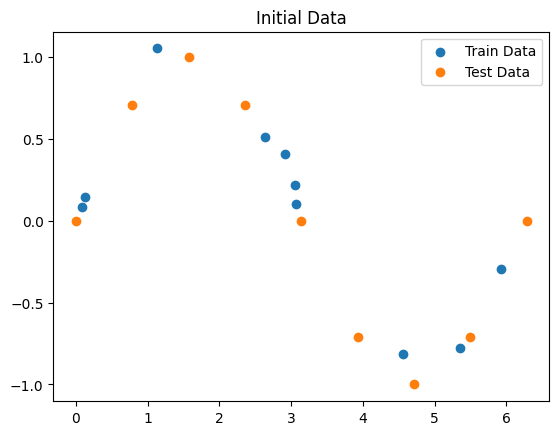

Degree=9 alpha=1.0
MSE Train:0.015 Test:1.165


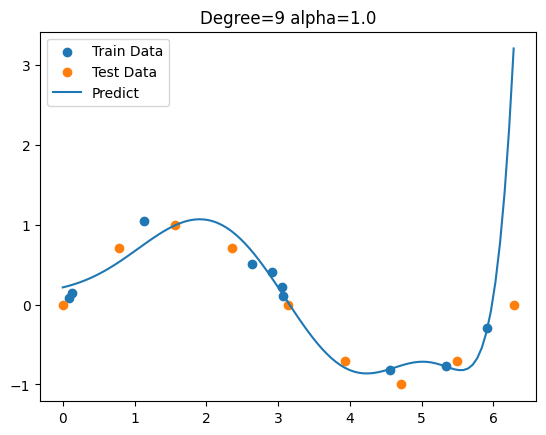

In [15]:
#手順１　訓練データと評価データの作成
import numpy as np
import pandas as pd

#sin関数を乱数で訓練用のデータを
np.random.seed(11)
X = np.random.uniform(0.0, 2 * np.pi, 10)
y = np.sin(X) + np.random.uniform(0,0.2,10)

#手順２
#訓練用のデータは、Sin関数にノイズを与えたデータ
X_train = X.reshape(-1,1)
y_train = y
#評価用のデータは、0から1/4π間隔で2πのSin関数の値
X_test = np.arange(0, 2 * np.pi + 0.25 * np.pi, 0.25 * np.pi).reshape(-1,1)
y_test = np.sin(X_test)

#Xとyのデータをグラフで表示
import matplotlib.pyplot as plt
#plt.style.use("default")
plt.title("Initial Data")
plt.scatter(X_train, y_train, label="Train Data")
plt.scatter(X_test, y_test, label="Test Data")
plt.legend()
plt.show()
plt.close()

#多項式回帰分析をするために説明変数のデータを多項式で計算
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=9)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

#手順3　モデルの選択
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)

#手順4　モデルの訓練
model.fit(X_train_poly, y_train)

#手順5　モデルで予測
y_train_pred= model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

#手順6　モデルの評価
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Degree=9 alpha=1.0")
print(f"MSE Train:{mean_squared_error(y_train, y_train_pred):.3f} Test:{mean_squared_error(y_test, y_test_pred):.3f}")

#グラフで表示
X_grid = np.linspace(0, 2 * np.pi, 100).reshape(-1,1)
X_grid_poly = poly.fit_transform(X_grid)
y_grid_pred = model.predict(X_grid_poly)
plt.scatter(X_train, y_train, label="Train Data")
plt.scatter(X_test, y_test, label="Test Data")
plt.title(f"Degree=9 alpha=1.0")
plt.plot(X_grid, y_grid_pred, label="Predict")
plt.legend()
plt.show()
plt.close()


####正則化係数0.1、1.0、50.0の実行結果

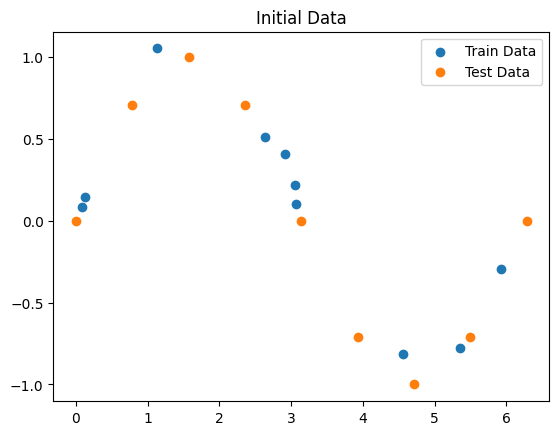

Degree=9 
alpha=0.1 MSE Train:0.003 Test:0.397
alpha=1.0 MSE Train:0.015 Test:1.165
alpha=10.0 MSE Train:0.055 Test:0.081


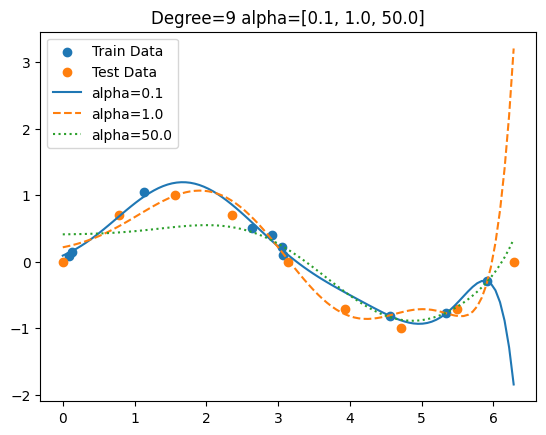

In [16]:
#手順１　訓練データと評価データの作成
import numpy as np
import pandas as pd

#sin関数を乱数で訓練用のデータを
np.random.seed(11)
X = np.random.uniform(0.0, 2 * np.pi, 10)
y = np.sin(X) + np.random.uniform(0,0.2,10)

#手順２
#訓練用のデータは、Sin関数にノイズを与えたデータ
X_train = X.reshape(-1,1)
y_train = y
#評価用のデータは、0から1/4π間隔で2πのSin関数の値
X_test = np.arange(0, 2 * np.pi + 0.25 * np.pi, 0.25 * np.pi).reshape(-1,1)
y_test = np.sin(X_test)

#Xとyのデータをグラフで表示
import matplotlib.pyplot as plt
plt.title("Initial Data")
plt.scatter(X_train, y_train, label="Train Data")
plt.scatter(X_test, y_test, label="Test Data")
plt.legend()
plt.show()
plt.close()

#多項式回帰分析をするために説明変数のデータを多項式で計算
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=9)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

#手順3　モデルの選択
from sklearn.linear_model import Ridge
model1 = Ridge(alpha=0.1)
model2 = Ridge(alpha=1.0)
model3 = Ridge(alpha=50.0)

#手順4　モデルの訓練
model1.fit(X_train_poly, y_train)
model2.fit(X_train_poly, y_train)
model3.fit(X_train_poly, y_train)

#手順5　モデルで予測
y1_train_pred= model1.predict(X_train_poly)
y1_test_pred = model1.predict(X_test_poly)
y2_train_pred= model2.predict(X_train_poly)
y2_test_pred = model2.predict(X_test_poly)
y3_train_pred= model3.predict(X_train_poly)
y3_test_pred = model3.predict(X_test_poly)

#手順6　モデルの評価
from sklearn.metrics import mean_squared_error
train1_mse = mean_squared_error(y_train, y1_train_pred)
test1_mse = mean_squared_error(y_test, y1_test_pred)
train2_mse = mean_squared_error(y_train, y2_train_pred)
test2_mse = mean_squared_error(y_test, y2_test_pred)
train3_mse = mean_squared_error(y_train, y3_train_pred)
test3_mse = mean_squared_error(y_test, y3_test_pred)
print(f"Degree=9 ")
print(f"alpha=0.1 MSE Train:{train1_mse:.3f} Test:{test1_mse:.3f}")
print(f"alpha=1.0 MSE Train:{train2_mse:.3f} Test:{test2_mse:.3f}")
print(f"alpha=10.0 MSE Train:{train3_mse:.3f} Test:{test3_mse:.3f}")

#グラフで表示
X_grid = np.linspace(0, 2 * np.pi, 100).reshape(-1,1)
X_grid_poly = poly.fit_transform(X_grid)
y1_grid_pred = model1.predict(X_grid_poly)
y2_grid_pred = model2.predict(X_grid_poly)
y3_grid_pred = model3.predict(X_grid_poly)
plt.title("Degree=9 alpha=[0.1, 1.0, 50.0]")
plt.scatter(X_train, y_train, label="Train Data")
plt.scatter(X_test, y_test, label="Test Data")

plt.plot(X_grid, y1_grid_pred, label="alpha=0.1", linestyle="-")
plt.plot(X_grid, y2_grid_pred, label="alpha=1.0", linestyle="--")
plt.plot(X_grid, y3_grid_pred, label="alpha=50.0", linestyle=":")
plt.legend()
plt.show()
plt.close()

###9.3.2　例題　Lasso回帰でカリフォルニア住宅価格問題

In [17]:
#手順1　データの作成
import pandas as pd
import numpy as np

#サンプルデータが収められているモジュール scikit-learnのdatasetsから
#目的のデータセットを読み込む
from sklearn.datasets import fetch_california_housing

#cal_dfとしてデータを変数に読み込む
cal_df = fetch_california_housing(as_frame=True)

#特徴ベクトル（説明変数をベクトルデータ）として読み込む
X = cal_df.data
#display( X )

#正解ラベル（目的変数）を読み込む
y = cal_df.target
#display( y )

#手順2　前処理
#標準化 fit_transformメソッドにより特徴量Xが標準化される
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X)

#多項式回帰
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_std)

#標準化された特徴量X_stdと正解ラベルを訓練データと評価データに7:3で分割
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_poly, y, test_size=0.3, random_state=10)

print( f"訓練用の特徴ベクトルの次数 {X_train.shape} 正解ラベルの次数{y_train.shape}")
print( f"評価用の特徴ベクトルの次数 {X_test.shape} 正解ラベルの次数 {y_test.shape}")

#手順３
#線形回帰モデルのインポート
from sklearn.linear_model import Lasso
model = Lasso(alpha=1.0)

#手順４
#モデルの学習　標準化されたデータを使う
model.fit(X_train,y_train)

#手順５　評価用のデータをモデルに適用し結果を予測
#y_train_predに、訓練用特徴ベクトルをモデルに代入したときの予測を計算
y_train_pred = model.predict(X_train)
#評価用の特徴ベクトルをモデルに代入し予測値を計算
y_test_pred = model.predict(X_test)

#手順６
#モデルの正確性を評価する
#MAEで評価する場合
from sklearn.metrics import mean_absolute_error
#決定係数を算出する
from sklearn.metrics import r2_score

#訓練用データのMAE
mae_train = mean_absolute_error(y_train, y_train_pred)
#評価用データのMAE
mae_test =  mean_absolute_error(y_test, y_test_pred)

#RMSEで評価する場合
from sklearn.metrics import mean_squared_error
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test =  np.sqrt(mean_squared_error(y_test, y_test_pred))

#決定係数
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f"Lasso回帰 alpha=1.0")
print( f"訓練データ MAE={mae_train:.3f}　RMSE={rmse_train:.3f} r2={r2_train:.3f}")
print( f"評価データ MAE={mae_test:.3f}　 RMSE={rmse_test:.3f} r2={r2_test:.3f}")


訓練用の特徴ベクトルの次数 (14448, 165) 正解ラベルの次数(14448,)
評価用の特徴ベクトルの次数 (6192, 165) 正解ラベルの次数 (6192,)
Lasso回帰 alpha=1.0
訓練データ MAE=0.858　RMSE=1.081 r2=0.116
評価データ MAE=0.875　 RMSE=1.118 r2=0.078


####alphaを0.01, 0.1, 1.0, 10に変化させたときのモデルを比較

In [18]:
#手順1　データの作成
import pandas as pd
import numpy as np

#サンプルデータが収められているモジュール scikit-learnのdatasetsから
#目的のデータセットを読み込む
from sklearn.datasets import fetch_california_housing

#cal_dfとしてデータを変数に読み込む
cal_df = fetch_california_housing(as_frame=True)

#特徴ベクトル（説明変数をベクトルデータ）として読み込む
X = cal_df.data
#display( X )

#正解ラベル（目的変数）を読み込む
y = cal_df.target
#display( y )

#手順2　前処理
#標準化 fit_transformメソッドにより特徴量Xが標準化される
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X)

#多項式回帰
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_std)

#標準化された特徴量X_stdと正解ラベルを訓練データと評価データに7:3で分割
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_poly, y, test_size=0.3, random_state=10)

print( f"訓練用の特徴ベクトルの次数 {X_train.shape} 正解ラベルの次数{y_train.shape}")
print( f"評価用の特徴ベクトルの次数 {X_test.shape} 正解ラベルの次数 {y_test.shape}")

for al in [0.05,0.1,1.0,10]:
    #手順３
    #線形回帰モデルのインポート
    from sklearn.linear_model import Lasso
    model = Lasso(alpha=al, max_iter=10000)

    #手順４
    #モデルの学習　標準化されたデータを使う
    model.fit(X_train,y_train)

    #手順５　評価用のデータをモデルに適用し結果を予測
    #y_train_predに、訓練用特徴ベクトルをモデルに代入したときの予測を計算
    y_train_pred = model.predict(X_train)
    #評価用の特徴ベクトルをモデルに代入し予測値を計算
    y_test_pred = model.predict(X_test)

    #手順６
    #モデルの正確性を評価する
    #MAEで評価する場合
    from sklearn.metrics import mean_absolute_error
    #決定係数を算出する
    from sklearn.metrics import r2_score

    #訓練用データのMAE
    mae_train = mean_absolute_error(y_train, y_train_pred)
    #評価用データのMAE
    mae_test =  mean_absolute_error(y_test, y_test_pred)

    #RMSEで評価する場合
    from sklearn.metrics import mean_squared_error
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test =  np.sqrt(mean_squared_error(y_test, y_test_pred))

    #決定係数
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    print(f"Lasso回帰 alpha={al}")
    print( f"訓練データ MAE={mae_train:.3f}　RMSE={rmse_train:.3f}　r2={r2_train:.3f}")
    print( f"評価データ MAE={mae_test:.3f}　RMSE={rmse_test:.3f}　r2={r2_test:.3f}")


訓練用の特徴ベクトルの次数 (14448, 165) 正解ラベルの次数(14448,)
評価用の特徴ベクトルの次数 (6192, 165) 正解ラベルの次数 (6192,)
Lasso回帰 alpha=0.05
訓練データ MAE=0.564　RMSE=0.758　r2=0.566
評価データ MAE=0.575　RMSE=0.854　r2=0.462
Lasso回帰 alpha=0.1
訓練データ MAE=0.587　RMSE=0.782　r2=0.537
評価データ MAE=0.595　RMSE=0.816　r2=0.509
Lasso回帰 alpha=1.0
訓練データ MAE=0.858　RMSE=1.081　r2=0.116
評価データ MAE=0.875　RMSE=1.118　r2=0.078
Lasso回帰 alpha=10
訓練データ MAE=0.907　RMSE=1.149　r2=0.000
評価データ MAE=0.922　RMSE=1.165　r2=-0.001


##9.4　Elasic Net回帰とGrid_Searchモジュール

####カリフォルニア住宅問題の特徴量のVIFを求めるプログラム

In [19]:
import numpy as np
import pandas as pd

#データ読み込み
from sklearn.datasets import fetch_california_housing
cal_df = fetch_california_housing(as_frame=True)
#特徴ベクトル（説明変数をベクトルデータ）として読み込む
X = cal_df.data

#VIF算出関数のインポート
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import add_constant
#特徴量カラムの読み込み
X_const = add_constant(X)  # 定数項を追加
vif_data = pd.DataFrame(index=X_const.columns)
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
display(vif_data.sort_values(by="VIF", ascending=False))

,VIF
const,17082.623698
Latitude,9.297624
Longitude,8.962263
AveRooms,8.342786
AveBedrms,6.994995
MedInc,2.501295
HouseAge,1.241254
Population,1.138125
AveOccup,1.008324


####Elasitc Net回帰でカリフォルニア住宅問題

ハイパーパラメータalpha=1.0 ,l1_ratio=0.5とした時

In [20]:
import numpy as np
import pandas as pd

#手順1　データ読み込み
#サンプルデータが収められているモジュール scikit-learnのdatasetsから
#目的のデータセットを読み込む
from sklearn.datasets import fetch_california_housing

#cal_dfとしてデータを変数に読み込む
cal_df = fetch_california_housing(as_frame=True)

#特徴ベクトル（説明変数をベクトルデータ）として読み込む
X = cal_df.data
#display( X )

#正解ラベル（目的変数）を読み込む
y = cal_df.target
#display( y )

#手順2　前処理
#標準化 fit_transformメソッドにより特徴量Xが標準化される
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X)

#特徴量を多項式データに変換
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_std)

#標準化された特徴量X_stdと正解ラベルを訓練データと評価データに7:3で分割
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_poly, y, test_size=0.3, random_state=10)

print( f"訓練用の特徴ベクトルの次数 {X_train.shape} 正解ラベルの次数{y_train.shape}")
print( f"評価用の特徴ベクトルの次数 {X_test.shape} 正解ラベルの次数 {y_test.shape}")

#手順3
#Elastic Net回帰分析をするモジュール
from sklearn.linear_model import ElasticNet
#ハイパーパラメータの設定
model = ElasticNet(alpha=1.0,l1_ratio=0.5)

#手順４
#モデルの学習　標準化されたデータを使う
model.fit(X_train,y_train)

#手順５　評価用のデータをモデルに適用し結果を予測
#y_train_predに、訓練用特徴ベクトルをモデルに代入したときの予測を計算
y_train_pred = model.predict(X_train)
#評価用の特徴ベクトルをモデルに代入し予測値を計算
y_test_pred = model.predict(X_test)

#手順６
#モデルの正確性を評価する
#MAEで評価する場合
from sklearn.metrics import mean_absolute_error
#決定係数を算出する
from sklearn.metrics import r2_score

#訓練用データのMAE
mae_train = mean_absolute_error(y_train, y_train_pred)
#評価用データのMAE
mae_test =  mean_absolute_error(y_test, y_test_pred)

#RMSEで評価する場合
from sklearn.metrics import mean_squared_error
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test =  np.sqrt(mean_squared_error(y_test, y_test_pred))

#決定係数
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f"Elastic Net回帰 alpha=1.0 l1_ratio=0.5")
print( f"訓練データ MAE={mae_train:.3f}　RMSE={rmse_train:.3f}　r2={r2_train:.3f}")
print( f"評価データ MAE={mae_test:.3f}　RMSE={rmse_test:.3f}　r2={r2_test:.3f}")


訓練用の特徴ベクトルの次数 (14448, 165) 正解ラベルの次数(14448,)
評価用の特徴ベクトルの次数 (6192, 165) 正解ラベルの次数 (6192,)
Elastic Net回帰 alpha=1.0 l1_ratio=0.5
訓練データ MAE=0.815　RMSE=1.033　r2=0.192
評価データ MAE=0.834　RMSE=1.087　r2=0.128


#### GridSearchモジュールで最適なパラメータを見つける

In [21]:
import numpy as np
import pandas as pd

#手順1　データ読み込み
#サンプルデータが収められているモジュール scikit-learnのdatasetsから
#目的のデータセットを読み込む
from sklearn.datasets import fetch_california_housing

#cal_dfとしてデータを変数に読み込む
cal_df = fetch_california_housing(as_frame=True)

#特徴ベクトル（説明変数をベクトルデータ）として読み込む
X = cal_df.data
#display( X )

#正解ラベル（目的変数）を読み込む
y = cal_df.target
#display( y )

#手順2　前処理
#標準化 fit_transformメソッドにより特徴量Xが標準化される
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X)

#特徴量を多項式データに変換
#from sklearn.preprocessing import PolynomialFeatures
#poly = PolynomialFeatures(degree=3)
#X_poly = poly.fit_transform(X_std)

#標準化された特徴量X_stdと正解ラベルを訓練データと評価データに7:3で分割
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_std, y, test_size=0.3, random_state=10)

print( f"訓練用の特徴ベクトルの次数 {X_train.shape} 正解ラベルの次数{y_train.shape}")
print( f"評価用の特徴ベクトルの次数 {X_test.shape} 正解ラベルの次数 {y_test.shape}")

#手順３　モデルの指定
#Elastic Net回帰分析をするモジュール
from sklearn.linear_model import ElasticNet
#パラメータ算出の最大繰り返し回数を10000回に設定
model = ElasticNet(max_iter=10000)

#GridSearchモジュールのインポート
from sklearn.model_selection import GridSearchCV

#ハイパーパラメータの候補を指定
param_grid = {
    "alpha": [0.05, 0.1, 1.0, 10.0],
    "l1_ratio": [0.2,0.5,0.8]
}

# GridSearchCVを実行
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="neg_mean_squared_error")

#手順４　モデルの訓練
grid_search.fit(X_train, y_train)

# 最適なパラメータ
print("Best Parameters:", grid_search.best_params_)
# 最適なモデル
best_model = grid_search.best_estimator_

#手順５　評価用のデータをモデルに適用し結果を予測
#y_train_predに、訓練用特徴ベクトルをモデルに代入したときの予測を計算
y_train_pred = best_model.predict(X_train)
#評価用の特徴ベクトルをモデルに代入し予測値を計算
y_test_pred = best_model.predict(X_test)

#手順６
#モデルの正確性を評価する
#MAEで評価する場合
from sklearn.metrics import mean_absolute_error
#決定係数を算出する
from sklearn.metrics import r2_score

#訓練用データのMAE
mae_train = mean_absolute_error(y_train, y_train_pred)
#評価用データのMAE
mae_test =  mean_absolute_error(y_test, y_test_pred)

#RMSEで評価する場合
from sklearn.metrics import mean_squared_error
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test =  np.sqrt(mean_squared_error(y_test, y_test_pred))

#決定係数
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print( f"訓練データ MAE={mae_train:.3f}　RMSE={rmse_train:.3f}　r2={r2_train:.3f}")
print( f"評価データ MAE={mae_test:.3f}　RMSE={rmse_test:.3f}　r2={r2_test:.3f}")



訓練用の特徴ベクトルの次数 (14448, 8) 正解ラベルの次数(14448,)
評価用の特徴ベクトルの次数 (6192, 8) 正解ラベルの次数 (6192,)
Best Parameters: {'alpha': 0.05, 'l1_ratio': 0.2}
訓練データ MAE=0.547　RMSE=0.740　r2=0.586
評価データ MAE=0.553　RMSE=0.755　r2=0.580


##9.5　サポータベクタマシン回帰分析

###例題　線形サポートベクタマシン回帰(SVR)で実装

####C=1.0、epsilon=0.1と固定したとき

In [22]:
import numpy as np
import pandas as pd

#手順1　データ読み込み
#サンプルデータが収められているモジュール scikit-learnのdatasetsから
#目的のデータセットを読み込む
from sklearn.datasets import fetch_california_housing

#cal_dfとしてデータを変数に読み込む
cal_df = fetch_california_housing(as_frame=True)

#特徴ベクトル（説明変数をベクトルデータ）として読み込む
X = cal_df.data
#display( X )

#正解ラベル（目的変数）を読み込む
y = cal_df.target
#display( y )

#手順2　前処理
#標準化 fit_transformメソッドにより特徴量Xが標準化される
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X)

#標準化された特徴量X_stdと正解ラベルを訓練データと評価データに7:3で分割
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_std, y, test_size=0.3, random_state=10)

print( f"訓練用の特徴ベクトルの次数 {X_train.shape} 正解ラベルの次数{y_train.shape}")
print( f"評価用の特徴ベクトルの次数 {X_test.shape} 正解ラベルの次数 {y_test.shape}")

#手順3
from sklearn.svm import SVR
c = 1.0
ep=0.1
model = SVR(kernel="linear", C=c, epsilon=ep)

#手順4
model.fit(X_train, y_train)

#手順５　評価用のデータをモデルに適用し結果を予測
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
#評価用データの先頭5件分の予測値と実データの違い
#print( f"実データ\n {np.array(y_test[:5])}" )
#print( f"予測データ\n {y_test_pred[:5]}")

#手順６
#モデルの正確性を評価する
#MAEで評価する場合
from sklearn.metrics import mean_absolute_error
#決定係数を算出する
from sklearn.metrics import r2_score

#訓練用データのMAE
mae_train = mean_absolute_error(y_train, y_train_pred)
#評価用データのMAE
mae_test =  mean_absolute_error(y_test, y_test_pred)

#RMSEで評価する場合
from sklearn.metrics import mean_squared_error
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test =  np.sqrt(mean_squared_error(y_test, y_test_pred))

print( f"C={c} epsilon={ep}")
print( f"訓練データ MAE={mae_train:.3f}　RMSE={rmse_train:.3f}")
print( f"評価データ MAE={mae_test:.3f}　 RMSE={rmse_test:.3f} ")



訓練用の特徴ベクトルの次数 (14448, 8) 正解ラベルの次数(14448,)
評価用の特徴ベクトルの次数 (6192, 8) 正解ラベルの次数 (6192,)
C=1.0 epsilon=0.1
訓練データ MAE=0.506　RMSE=1.053
評価データ MAE=0.524　 RMSE=1.916 


####Cを1.0に固定し、epsilonを0.01, 0.1, 0.5, 1に変更した場合

In [23]:
import numpy as np
import pandas as pd

#手順1　データ読み込み
#サンプルデータが収められているモジュール scikit-learnのdatasetsから
#目的のデータセットを読み込む
from sklearn.datasets import fetch_california_housing

#cal_dfとしてデータを変数に読み込む
cal_df = fetch_california_housing(as_frame=True)

#特徴ベクトル（説明変数をベクトルデータ）として読み込む
X = cal_df.data
#display( X )

#正解ラベル（目的変数）を読み込む
y = cal_df.target
#display( y )

#手順2　前処理
#標準化 fit_transformメソッドにより特徴量Xが標準化される
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X)

#標準化された特徴量X_stdと正解ラベルを訓練データと評価データに7:3で分割
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_std, y, test_size=0.3, random_state=10)

print( f"訓練用の特徴ベクトルの次数 {X_train.shape} 正解ラベルの次数{y_train.shape}")
print( f"評価用の特徴ベクトルの次数 {X_test.shape} 正解ラベルの次数 {y_test.shape}")

from sklearn.svm import SVR
c = 1.0

for ep in [0.01, 0.1, 0.5, 1.0]:
    #手順3
    model = SVR(kernel="linear", C=c, epsilon=ep)

    #手順4
    model.fit(X_train, y_train)

    #手順５　評価用のデータをモデルに適用し結果を予測
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    #評価用データの先頭5件分の予測値と実データの違い
    #print( f"実データ\n {np.array(y_test[:5])}" )
    #print( f"予測データ\n {y_test_pred[:5]}")

    #手順６
    #モデルの正確性を評価する
    #MAEで評価する場合
    from sklearn.metrics import mean_absolute_error
    #決定係数を算出する
    from sklearn.metrics import r2_score

    #訓練用データのMAE
    mae_train = mean_absolute_error(y_train, y_train_pred)
    #評価用データのMAE
    mae_test =  mean_absolute_error(y_test, y_test_pred)

    #RMSEで評価する場合
    from sklearn.metrics import mean_squared_error
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test =  np.sqrt(mean_squared_error(y_test, y_test_pred))

    print( f"C={c} epsilon={ep}")
    print( f"訓練データ MAE={mae_train:.3f}　RMSE={rmse_train:.3f}")
    print( f"評価データ MAE={mae_test:.3f}　 RMSE={rmse_test:.3f} ")



訓練用の特徴ベクトルの次数 (14448, 8) 正解ラベルの次数(14448,)
評価用の特徴ベクトルの次数 (6192, 8) 正解ラベルの次数 (6192,)
C=1.0 epsilon=0.01
訓練データ MAE=0.506　RMSE=1.072
評価データ MAE=0.524　 RMSE=1.968 
C=1.0 epsilon=0.1
訓練データ MAE=0.506　RMSE=1.053
評価データ MAE=0.524　 RMSE=1.916 
C=1.0 epsilon=0.5
訓練データ MAE=0.516　RMSE=0.795
評価データ MAE=0.530　 RMSE=1.091 
C=1.0 epsilon=1.0
訓練データ MAE=0.592　RMSE=0.746
評価データ MAE=0.607　 RMSE=0.768 


####epsilonを1.0に固定し、Cを0.1, 1.0, 5.0に変更した場合

In [24]:
import numpy as np
import pandas as pd

#手順1　データ読み込み
#サンプルデータが収められているモジュール scikit-learnのdatasetsから
#目的のデータセットを読み込む
from sklearn.datasets import fetch_california_housing

#cal_dfとしてデータを変数に読み込む
cal_df = fetch_california_housing(as_frame=True)

#特徴ベクトル（説明変数をベクトルデータ）として読み込む
X = cal_df.data
#display( X )

#正解ラベル（目的変数）を読み込む
y = cal_df.target
#display( y )

#手順2　前処理
#標準化 fit_transformメソッドにより特徴量Xが標準化される
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X)

#標準化された特徴量X_stdと正解ラベルを訓練データと評価データに7:3で分割
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_std, y, test_size=0.3, random_state=10)

print( f"訓練用の特徴ベクトルの次数 {X_train.shape} 正解ラベルの次数{y_train.shape}")
print( f"評価用の特徴ベクトルの次数 {X_test.shape} 正解ラベルの次数 {y_test.shape}")

from sklearn.svm import SVR
ep = 0.1

for c in [ 0.1, 1.0, 5.0]:
    #手順3
    model = SVR(kernel="linear", C=c, epsilon=ep)

    #手順4
    model.fit(X_train, y_train)

    #手順５　評価用のデータをモデルに適用し結果を予測
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    #評価用データの先頭5件分の予測値と実データの違い
    #print( f"実データ\n {np.array(y_test[:5])}" )
    #print( f"予測データ\n {y_test_pred[:5]}")

    #手順６
    #モデルの正確性を評価する
    #MAEで評価する場合
    from sklearn.metrics import mean_absolute_error
    #決定係数を算出する
    from sklearn.metrics import r2_score

    #訓練用データのMAE
    mae_train = mean_absolute_error(y_train, y_train_pred)
    #評価用データのMAE
    mae_test =  mean_absolute_error(y_test, y_test_pred)

    #RMSEで評価する場合
    from sklearn.metrics import mean_squared_error
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test =  np.sqrt(mean_squared_error(y_test, y_test_pred))

    print( f"C={c} epsilon={ep}")
    print( f"訓練データ MAE={mae_train:.3f}　RMSE={rmse_train:.3f}")
    print( f"評価データ MAE={mae_test:.3f}　 RMSE={rmse_test:.3f} ")



訓練用の特徴ベクトルの次数 (14448, 8) 正解ラベルの次数(14448,)
評価用の特徴ベクトルの次数 (6192, 8) 正解ラベルの次数 (6192,)
C=0.1 epsilon=0.1
訓練データ MAE=0.506　RMSE=1.014
評価データ MAE=0.523　 RMSE=1.799 
C=1.0 epsilon=0.1
訓練データ MAE=0.506　RMSE=1.053
評価データ MAE=0.524　 RMSE=1.916 
C=5.0 epsilon=0.1
訓練データ MAE=0.506　RMSE=1.059
評価データ MAE=0.524　 RMSE=1.931 


###9.5.3 例題 ガウスカーネルサポートベクタマシン回帰分析

In [25]:
import numpy as np
import pandas as pd

#手順1　データ読み込み
#サンプルデータが収められているモジュール scikit-learnのdatasetsから
#目的のデータセットを読み込む
from sklearn.datasets import fetch_california_housing

#cal_dfとしてデータを変数に読み込む
cal_df = fetch_california_housing(as_frame=True)

#特徴ベクトル（説明変数をベクトルデータ）として読み込む
X = cal_df.data
#display( X )

#正解ラベル（目的変数）を読み込む
y = cal_df.target
#display( y )

#手順2　前処理
#標準化 fit_transformメソッドにより特徴量Xが標準化される
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X)

#標準化された特徴量X_stdと正解ラベルを訓練データと評価データに7:3で分割
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_std, y, test_size=0.3, random_state=10)

print( f"訓練用の特徴ベクトルの次数 {X_train.shape} 正解ラベルの次数{y_train.shape}")
print( f"評価用の特徴ベクトルの次数 {X_test.shape} 正解ラベルの次数 {y_test.shape}")

#手順3
from sklearn.svm import SVR
c = 1.0
ep=0.1
ker="rbf"
model = SVR(kernel=ker, C=c, epsilon=ep)

#手順4
model.fit(X_train, y_train)

#手順５　評価用のデータをモデルに適用し結果を予測
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
#評価用データの先頭5件分の予測値と実データの違い
#print( f"実データ\n {np.array(y_test[:5])}" )
#print( f"予測データ\n {y_test_pred[:5]}")

#手順６
#モデルの正確性を評価する
#MAEで評価する場合
from sklearn.metrics import mean_absolute_error
#決定係数を算出する
from sklearn.metrics import r2_score

#訓練用データのMAE
mae_train = mean_absolute_error(y_train, y_train_pred)
#評価用データのMAE
mae_test =  mean_absolute_error(y_test, y_test_pred)

#RMSEで評価する場合
from sklearn.metrics import mean_squared_error
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test =  np.sqrt(mean_squared_error(y_test, y_test_pred))

print( f"kernel={ker} C={c} epsilon={ep}")
print( f"訓練データ MAE={mae_train:.3f}　RMSE={rmse_train:.3f}")
print( f"評価データ MAE={mae_test:.3f}　 RMSE={rmse_test:.3f} ")



訓練用の特徴ベクトルの次数 (14448, 8) 正解ラベルの次数(14448,)
評価用の特徴ベクトルの次数 (6192, 8) 正解ラベルの次数 (6192,)
kernel=rbf C=1.0 epsilon=0.1
訓練データ MAE=0.380　RMSE=0.574
評価データ MAE=0.397　 RMSE=0.599 


##9.6 決定木回帰分析とRandamForest回帰分析

9.6.1 例題 カリフォルニア住宅問題を決定木回帰分析により予測

訓練用の特徴ベクトルの次数 (14448, 8) 正解ラベルの次数(14448,)
評価用の特徴ベクトルの次数 (6192, 8) 正解ラベルの次数 (6192,)
訓練データ MAE=0.589　RMSE=0.787　r2=0.532
評価データ MAE=0.599　RMSE=0.798　r2=0.530


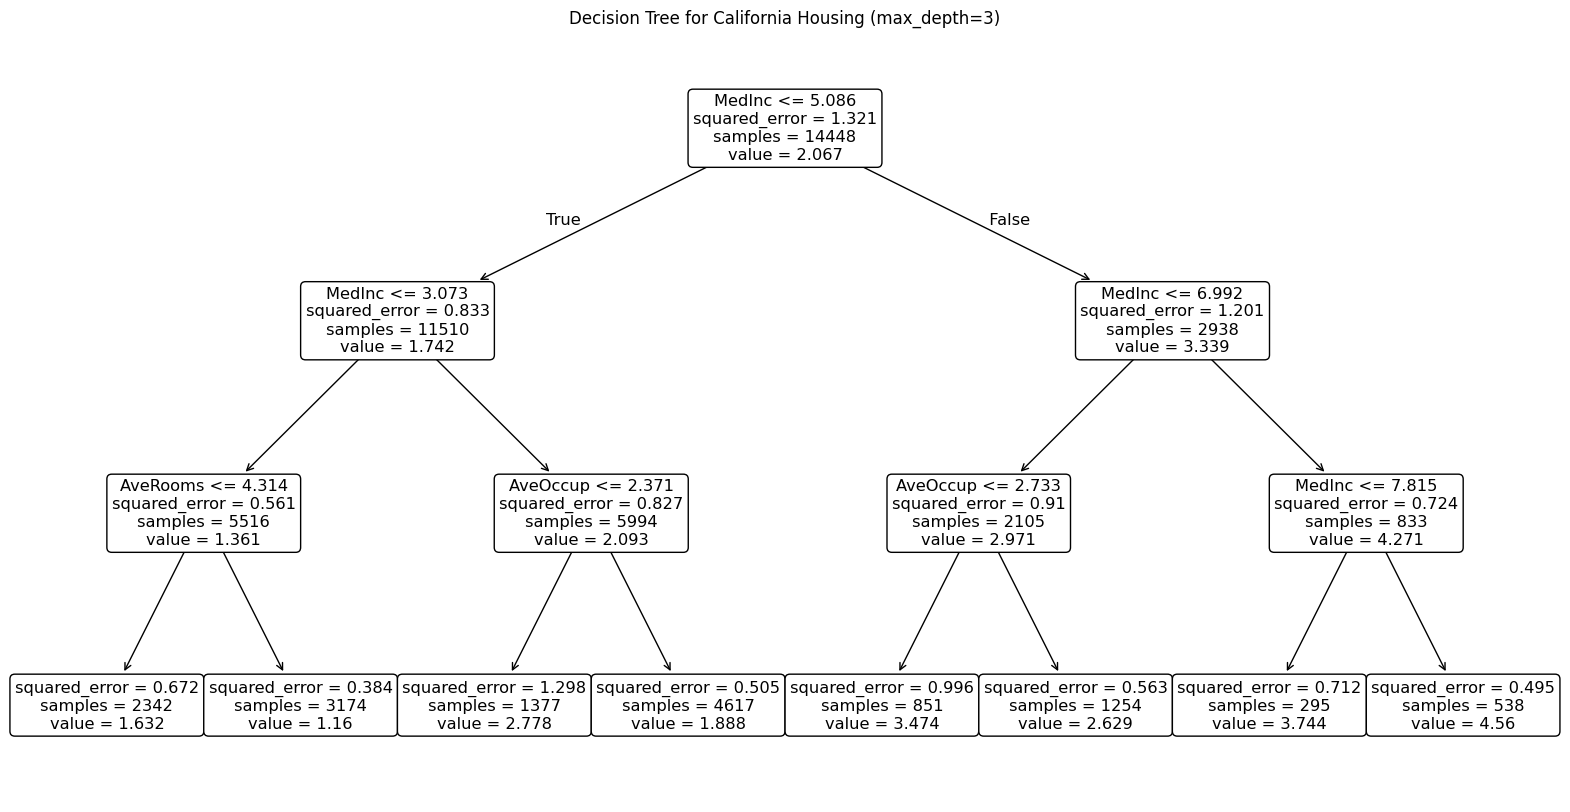

In [26]:
import numpy as np
import pandas as pd

#手順1　データ読み込み
#サンプルデータが収められているモジュール scikit-learnのdatasetsから
#目的のデータセットを読み込む
from sklearn.datasets import fetch_california_housing

#cal_dfとしてデータを変数に読み込む
cal_df = fetch_california_housing(as_frame=True)

#特徴ベクトル（説明変数をベクトルデータ）として読み込む
X = cal_df.data
#display( X )

#正解ラベル（目的変数）を読み込む
y = cal_df.target
#display( y )

#手順2　前処理
#標準化された特徴量X_stdと正解ラベルを訓練データと評価データに7:3で分割
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print( f"訓練用の特徴ベクトルの次数 {X_train.shape} 正解ラベルの次数{y_train.shape}")
print( f"評価用の特徴ベクトルの次数 {X_test.shape} 正解ラベルの次数 {y_test.shape}")

#手順３　モデルの指定
# 決定木回帰モデルの作成
from sklearn.tree import DecisionTreeRegressor, plot_tree
model = DecisionTreeRegressor(max_depth=3, random_state=10)
model.fit(X_train, y_train)

# モデルの予測
y_pred = model.predict(X_test)

#手順５　評価用のデータをモデルに適用し結果を予測
#y_train_predに、訓練用特徴ベクトルをモデルに代入したときの予測を計算
y_train_pred = model.predict(X_train)
#評価用の特徴ベクトルをモデルに代入し予測値を計算
y_test_pred = model.predict(X_test)

#手順６
#モデルの正確性を評価する
#MAEで評価する場合
from sklearn.metrics import mean_absolute_error, r2_score

#訓練用データのMAE
mae_train = mean_absolute_error(y_train, y_train_pred)
#評価用データのMAE
mae_test =  mean_absolute_error(y_test, y_test_pred)

#RMSEで評価する場合
from sklearn.metrics import mean_squared_error
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test =  np.sqrt(mean_squared_error(y_test, y_test_pred))

#決定係数
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print( f"訓練データ MAE={mae_train:.3f}　RMSE={rmse_train:.3f}　r2={r2_train:.3f}")
print( f"評価データ MAE={mae_test:.3f}　RMSE={rmse_test:.3f}　r2={r2_test:.3f}")

# 決定木の図示
import matplotlib.pyplot as plt
plt.style.use("default")
plt.subplots(figsize=(20, 10))
plot_tree(model, feature_names=cal_df.feature_names, filled=False,rounded=True)
plt.title("Decision Tree for California Housing (max_depth=3)")
plt.show()
plt.close()


###9.6.1 例題 ランダムフォレスト回帰分析で予測

訓練用の特徴ベクトルの次数 (14448, 8) 正解ラベルの次数(14448,)
評価用の特徴ベクトルの次数 (6192, 8) 正解ラベルの次数 (6192,)
訓練データ MAE=0.289　RMSE=0.410　r2=0.873
評価データ MAE=0.363　RMSE=0.538　r2=0.786


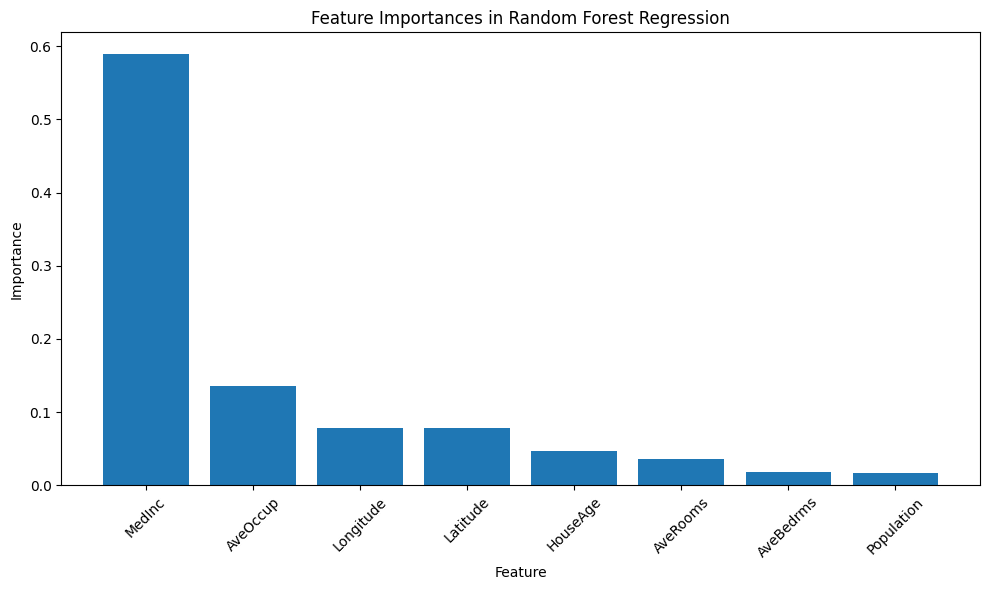

In [27]:
import numpy as np
import pandas as pd

#手順1　データ読み込み
#サンプルデータが収められているモジュール scikit-learnのdatasetsから
#目的のデータセットを読み込む
from sklearn.datasets import fetch_california_housing

#cal_dfとしてデータを変数に読み込む
cal_df = fetch_california_housing(as_frame=True)

#特徴ベクトル（説明変数をベクトルデータ）として読み込む
X = cal_df.data
#display( X )

#正解ラベル（目的変数）を読み込む
y = cal_df.target
#display( y )

#手順2　前処理
#標準化された特徴量X_stdと正解ラベルを訓練データと評価データに7:3で分割
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print( f"訓練用の特徴ベクトルの次数 {X_train.shape} 正解ラベルの次数{y_train.shape}")
print( f"評価用の特徴ベクトルの次数 {X_test.shape} 正解ラベルの次数 {y_test.shape}")

#手順３　モデルの指定
# 決定木回帰モデルの作成
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42)

#手順4　モデルの訓練
model.fit(X_train, y_train)

#手順５　評価用のデータをモデルに適用し結果を予測
#y_train_predに、訓練用特徴ベクトルをモデルに代入したときの予測を計算
y_train_pred = model.predict(X_train)
#評価用の特徴ベクトルをモデルに代入し予測値を計算
y_test_pred = model.predict(X_test)

#手順６
#モデルの正確性を評価する
#MAEで評価する場合
from sklearn.metrics import mean_absolute_error, r2_score

#訓練用データのMAE
mae_train = mean_absolute_error(y_train, y_train_pred)
#評価用データのMAE
mae_test =  mean_absolute_error(y_test, y_test_pred)

#RMSEで評価する場合
from sklearn.metrics import mean_squared_error
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test =  np.sqrt(mean_squared_error(y_test, y_test_pred))

#決定係数
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print( f"訓練データ MAE={mae_train:.3f}　RMSE={rmse_train:.3f}　r2={r2_train:.3f}")
print( f"評価データ MAE={mae_test:.3f}　RMSE={rmse_test:.3f}　r2={r2_test:.3f}")

# 特徴量の重要度を計算
feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# 特徴量の重要度をプロット
plt.figure(figsize=(10, 6))
plt.bar(feature_importances["Feature"], feature_importances["Importance"])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances in Random Forest Regression")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.close()

####max_depthを[2, 5, 10, 20, 40]と変化させたときの結果

In [28]:
import numpy as np
import pandas as pd

#手順1　データ読み込み
#サンプルデータが収められているモジュール scikit-learnのdatasetsから
#目的のデータセットを読み込む
from sklearn.datasets import fetch_california_housing

#cal_dfとしてデータを変数に読み込む
cal_df = fetch_california_housing(as_frame=True)

#特徴ベクトル（説明変数をベクトルデータ）として読み込む
X = cal_df.data
#display( X )

#正解ラベル（目的変数）を読み込む
y = cal_df.target
#display( y )

#手順2　前処理
#標準化された特徴量X_stdと正解ラベルを訓練データと評価データに7:3で分割
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print( f"訓練用の特徴ベクトルの次数 {X_train.shape} 正解ラベルの次数{y_train.shape}")
print( f"評価用の特徴ベクトルの次数 {X_test.shape} 正解ラベルの次数 {y_test.shape}")

#手順３　モデルの指定
# 決定木回帰モデルの作成
from sklearn.ensemble import RandomForestRegressor

for md in [2,5,10,20,40]:
    model = RandomForestRegressor(n_estimators=100, max_depth=md, random_state=42)

    #手順4　モデルの訓練
    model.fit(X_train, y_train)

    #手順５　評価用のデータをモデルに適用し結果を予測
    #y_train_predに、訓練用特徴ベクトルをモデルに代入したときの予測を計算
    y_train_pred = model.predict(X_train)
    #評価用の特徴ベクトルをモデルに代入し予測値を計算
    y_test_pred = model.predict(X_test)

    #手順６
    #モデルの正確性を評価する
    #MAEで評価する場合
    from sklearn.metrics import mean_absolute_error, r2_score

    #訓練用データのMAE
    mae_train = mean_absolute_error(y_train, y_train_pred)
    #評価用データのMAE
    mae_test =  mean_absolute_error(y_test, y_test_pred)

    #RMSEで評価する場合
    from sklearn.metrics import mean_squared_error
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test =  np.sqrt(mean_squared_error(y_test, y_test_pred))

    #決定係数
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    print( f"maxdepth={md}")
    print( f"訓練データ MAE={mae_train:.3f}　RMSE={rmse_train:.3f}　r2={r2_train:.3f}")
    print( f"評価データ MAE={mae_test:.3f}　RMSE={rmse_test:.3f}　r2={r2_test:.3f}")



訓練用の特徴ベクトルの次数 (14448, 8) 正解ラベルの次数(14448,)
評価用の特徴ベクトルの次数 (6192, 8) 正解ラベルの次数 (6192,)
maxdepth=2
訓練データ MAE=0.640　RMSE=0.841　r2=0.465
評価データ MAE=0.650　RMSE=0.853　r2=0.464
maxdepth=5
訓練データ MAE=0.476　RMSE=0.655　r2=0.675
評価データ MAE=0.489　RMSE=0.673　r2=0.666
maxdepth=10
訓練データ MAE=0.290　RMSE=0.412　r2=0.872
評価データ MAE=0.364　RMSE=0.540　r2=0.785
maxdepth=20
訓練データ MAE=0.128　RMSE=0.194　r2=0.971
評価データ MAE=0.330　RMSE=0.510　r2=0.808
maxdepth=40
訓練データ MAE=0.123　RMSE=0.190　r2=0.973
評価データ MAE=0.330　RMSE=0.510　r2=0.808


##9.7 XGBoost回帰分析とLightGBM回帰分析

###9.7.1 例題 XBGoostでカリフォルニア住宅価格問題を予測

訓練用の特徴ベクトルの次数 (14448, 8) 正解ラベルの次数(14448,)
評価用の特徴ベクトルの次数 (6192, 8) 正解ラベルの次数 (6192,)
訓練データ MAE=0.122　RMSE=0.182　r2=0.975
評価データ MAE=0.301　RMSE=0.467　r2=0.839


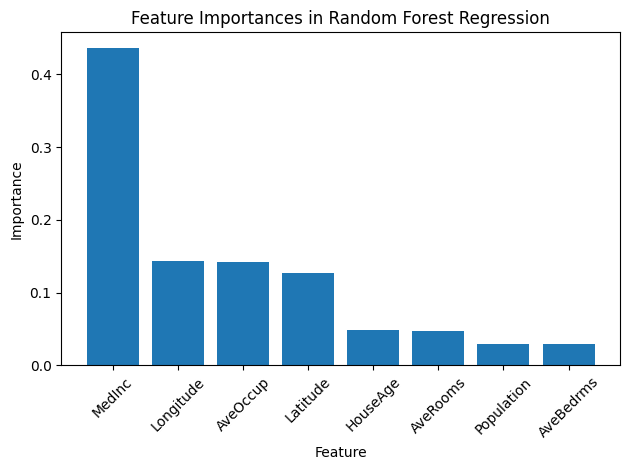

In [29]:
import numpy as np
import pandas as pd

#手順1　データ読み込み
#サンプルデータが収められているモジュール scikit-learnのdatasetsから
#目的のデータセットを読み込む
from sklearn.datasets import fetch_california_housing

#cal_dfとしてデータを変数に読み込む
cal_df = fetch_california_housing(as_frame=True)

#特徴ベクトル（説明変数をベクトルデータ）として読み込む
X = cal_df.data
#display( X )

#正解ラベル（目的変数）を読み込む
y = cal_df.target
#display( y )

#手順2　前処理
#標準化された特徴量X_stdと正解ラベルを訓練データと評価データに7:3で分割
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print( f"訓練用の特徴ベクトルの次数 {X_train.shape} 正解ラベルの次数{y_train.shape}")
print( f"評価用の特徴ベクトルの次数 {X_test.shape} 正解ラベルの次数 {y_test.shape}")

#手順３　モデルの指定
# 決定木回帰モデルの作成
from xgboost import XGBRegressor
model = XGBRegressor(
    n_estimators=100,
    max_depth=10,
    learning_rate=0.1,
    reg_lambda=5.0,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=10
)
#手順4　モデルの訓練
model.fit(X_train, y_train)

#手順５　評価用のデータをモデルに適用し結果を予測
#y_train_predに、訓練用特徴ベクトルをモデルに代入したときの予測を計算
y_train_pred = model.predict(X_train)
#評価用の特徴ベクトルをモデルに代入し予測値を計算
y_test_pred = model.predict(X_test)

#手順６
#モデルの正確性を評価する
#MAEで評価する場合
from sklearn.metrics import mean_absolute_error, r2_score

#訓練用データのMAE
mae_train = mean_absolute_error(y_train, y_train_pred)
#評価用データのMAE
mae_test =  mean_absolute_error(y_test, y_test_pred)

#RMSEで評価する場合
from sklearn.metrics import mean_squared_error
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test =  np.sqrt(mean_squared_error(y_test, y_test_pred))

#決定係数
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print( f"訓練データ MAE={mae_train:.3f}　RMSE={rmse_train:.3f}　r2={r2_train:.3f}")
print( f"評価データ MAE={mae_test:.3f}　RMSE={rmse_test:.3f}　r2={r2_test:.3f}")

# 特徴量の重要度を計算
feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# 特徴量の重要度をプロット
import matplotlib.pyplot as plt
#plt.figure(figsize=(10, 6))
plt.bar(feature_importances["Feature"], feature_importances["Importance"])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances in Random Forest Regression")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


###9.7.2 LightGBMによる分析

In [30]:
#実行する前にモジュールをインストールするために、このセルを実行する
!pip install "dask[dataframe]"

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 4.1 MB/s eta 0:00:00


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026474 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 2.064560
訓練データ MAE=0.267　RMSE=0.391　r2=0.885
評価データ MAE=0.306　RMSE=0.467　r2=0.840


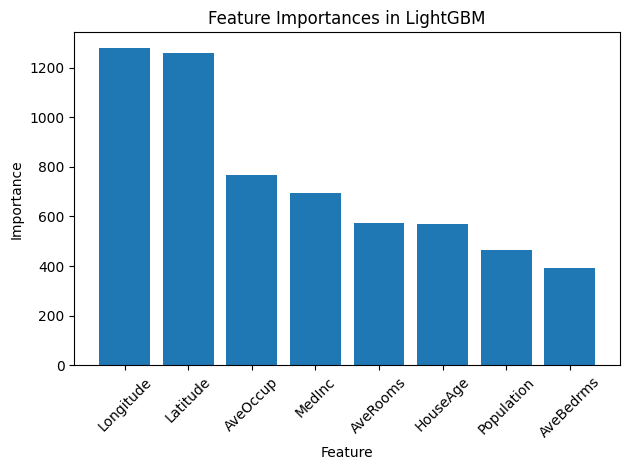

In [31]:
import numpy as np
import pandas as pd

#手順1　データ読み込み
#サンプルデータが収められているモジュール scikit-learnのdatasetsから
#目的のデータセットを読み込む
from sklearn.datasets import fetch_california_housing

#cal_dfとしてデータを変数に読み込む
cal_df = fetch_california_housing(as_frame=True)

#特徴ベクトル（説明変数をベクトルデータ）として読み込む
X = cal_df.data
#display( X )

#正解ラベル（目的変数）を読み込む
y = cal_df.target
#display( y )

#手順2　前処理
#標準化された特徴量X_stdと正解ラベルを訓練データと評価データに8:2で分割
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# LightGBM用データセットの作成
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

#手順３　モデルの指定
#LightGBMモデルパラメータの指定
params = {
    "objective": "regression",  #回帰問題
    "metric": "rmse",   #モデルの評価はrmse(Root Mean Squared Errro)
    "boosting_type": "gbdt", #勾配ブースティングアルゴリズムを採用
    "num_leaves": 31,   #決定木のリーフ数
    "learning_rate": 0.05,   #学習効率
    "feature_fraction": 0.8, #各決定木で使用する特徴量の割合
    "bagging_fraction": 0.8, #各決定木で使用するデータの割合
    "bagging_freq": 5,  #5回に1回の割合でデータをランダムに選択する
    "lambda_l1": 0.1,   #L1正則化係数
    "lambda_l2": 0.2    #L2正則化係数
}

#手順4　モデルの訓練
model = lgb.train(
    params, #モデルのハイパーパラメータ
    train_data, #訓練用のデータを指定
    valid_sets=[train_data, test_data], #評価用のデータを指定
    num_boost_round=200 #訓練する決定着の総数
)

#手順５　評価用のデータをモデルに適用し結果を予測
#y_train_predに、訓練用特徴ベクトルをモデルに代入したときの予測を計算
y_train_pred = model.predict(X_train)
#評価用の特徴ベクトルをモデルに代入し予測値を計算
y_test_pred = model.predict(X_test)

#手順６
#モデルの正確性を評価する
#MAEで評価する場合
from sklearn.metrics import mean_absolute_error, r2_score

#訓練用データのMAE
mae_train = mean_absolute_error(y_train, y_train_pred)
#評価用データのMAE
mae_test =  mean_absolute_error(y_test, y_test_pred)

#RMSEで評価する場合
from sklearn.metrics import mean_squared_error
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test =  np.sqrt(mean_squared_error(y_test, y_test_pred))

#決定係数
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print( f"訓練データ MAE={mae_train:.3f}　RMSE={rmse_train:.3f}　r2={r2_train:.3f}")
print( f"評価データ MAE={mae_test:.3f}　RMSE={rmse_test:.3f}　r2={r2_test:.3f}")

# 特徴量の重要度を計算
feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importance()
}).sort_values(by="Importance", ascending=False)

# 特徴量の重要度をプロット
import matplotlib.pyplot as plt
#plt.figure(figsize=(10, 6))
plt.bar(feature_importances["Feature"], feature_importances["Importance"])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances in LightGBM")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
